# Preparing training and validation dataset for MobileNet model training
At this stage, all four classes have already been trimmed and split as .wav files into durations < 2s, and the short tracks manually verified to remove silent contents that arose from splitting algorithm. 
##### We extract audio features, normalise, and scale to produce 3x sets of audio data for training.

# Loading folder path and set up empty lists
The folders contain .wav files of tracks < 2s duration (trimmed and split)

In [1]:
path = "C:/Users/Alicia/Desktop/new train data"

In [2]:
fall_path = path+'/fall_splits'
cough_path = path+'/cough_splits'
shout_path = path+'/shout_splits'
speech_path = path+'/speech_splits'

In [3]:
import os

import librosa, librosa.display
import numpy as np

import matplotlib.pyplot as plt

In [4]:
fall_list=os.listdir(fall_path)
cough_list=os.listdir(cough_path)
shout_list=os.listdir(shout_path)
speech_list=os.listdir(speech_path)

In [13]:
fall_splits = []
cough_splits = []
shout_splits = []
speech_splits = []

In [14]:
fall_total = []
cough_total = []
shout_total = []
speech_total = []

# Taking a step back to check durations of audio datasets (as received, before data pre-processing)
This was before splitting tracks to < 2s duration, a record for writing in my report

In [14]:
fall_path = path+'/fall'
cough_path = path+'/cough'
shout_path = path+'/shout'
speech_path = path+'/speech'

In [15]:
fall_list=os.listdir(fall_path)
cough_list=os.listdir(cough_path)
shout_list=os.listdir(shout_path)
speech_list=os.listdir(speech_path)

In [16]:
total_fall_duration = 0
i = 0

for filename in fall_list: 
    y,sr = librosa.load(fall_path+'/'+filename, sr=44100)
    time = librosa.get_duration(y, sr=44100)
    
    total_fall_duration = total_fall_duration + time
    i = i+1
    
print(i, total_fall_duration)

144 608.375170068027


In [17]:
total_cough_duration = 0
i = 0 

for filename in cough_list: 
    y,sr = librosa.load(cough_path+'/'+filename, sr=44100)
    time = librosa.get_duration(y, sr=44100)
    
    total_cough_duration = total_cough_duration + time
    i = i+1

print(i, total_cough_duration)

136 793.6943083900222


In [18]:
total_shout_duration = 0
i = 0

for filename in shout_list: 
    y,sr = librosa.load(shout_path+'/'+filename, sr=44100)
    time = librosa.get_duration(y, sr=44100)
    
    total_shout_duration = total_shout_duration + time
    i = i+1

print(i, total_shout_duration)

358 1270.9626984126996


In [19]:
total_speech_duration = 0
i=0

for filename in speech_list: 
    y,sr = librosa.load(speech_path+'/'+filename, sr=44100)
    time = librosa.get_duration(y, sr=44100)
    
    total_speech_duration = total_speech_duration + time
    i=i+1

print(i, total_speech_duration)

53 3258.6935827664392


# Check durations of audio dataset (split tracks)
Date pre-processing is performed on this 1x set of data, to produce 3x sets of data, after audio feature extraction, normalisation and scaling.

In [10]:
total_fall_duration = 0
i = 0

for filename in fall_list: 
    y,sr = librosa.load(fall_path+'/'+filename, sr=44100)
    time = librosa.get_duration(y, sr=44100)
    
    total_fall_duration = total_fall_duration + time
    i = i+1
    
print(i, total_fall_duration)

267 340.8245351473925


In [11]:
total_cough_duration = 0
i = 0 

for filename in cough_list: 
    y,sr = librosa.load(cough_path+'/'+filename, sr=44100)
    time = librosa.get_duration(y, sr=44100)
    
    total_cough_duration = total_cough_duration + time
    i = i+1

print(i, total_cough_duration)

404 692.8095691609976


In [12]:
total_shout_duration = 0
i = 0

for filename in shout_list: 
    y,sr = librosa.load(shout_path+'/'+filename, sr=44100)
    time = librosa.get_duration(y, sr=44100)
    
    total_shout_duration = total_shout_duration + time
    i = i+1

print(i, total_shout_duration)

678 1051.719795918368


In [13]:
total_speech_duration = 0
i=0

for filename in speech_list: 
    y,sr = librosa.load(speech_path+'/'+filename, sr=44100)
    time = librosa.get_duration(y, sr=44100)
    
    total_speech_duration = total_speech_duration + time
    i=i+1

print(i, total_speech_duration)

1458 2893.258526077097


# The code snippet below pads audio shorter than 2s to the full 2s duration. 
Note that short tracks have already been manually verified to remove silence content that arose from the splitting algorithm. At this stage, all loaded tracks are useful content.

# Audio pre-processing proceudres. 
## We pad shorter tracks to 2s, normalise, scale, and obtain its log mel spectrogram. 
## The process is repeated for all 4 classes of audio: fall, cough, shout, speech.
##### a. The length of 2s audio of array, when sampled at 44100Hz, is 88200. The shorter track is padded to a length of 88200, with '0', while the original content is centralised.
##### b. All audio is normalised by dividing by its |max|. 
##### c. All audio is scaled to cater to different volume recording of each audio class (account for differences that arise from volume recorded by microphone)
##### d. 2 librosa functions are used for audio feature extraction step (feature.melspectrogram and amplitude_to_db)
##### e. All data for each audio class is saved in a dictionary of lists.

# Fall

In [7]:
# from split samples (re-verified), sample + pad + scale + logspec

i = 0
SAMPLE_RATE = 44100

for filename in fall_list: ##### CHANGE HERE #####

    y, sr = librosa.load(fall_path+'/'+filename, sr=SAMPLE_RATE) ##### CHANGE HERE #####
    # y, sr = librosa.load(filepath, sr=SAMPLE_RATE)
    time = librosa.get_duration(y, sr=SAMPLE_RATE)

    if y.shape[0] != 88200:
        x = 88200 - y.shape[0]
        if (x%2 == 0):
            y_padded = np.pad(y, (int(x/2), int(x/2)), 'constant', constant_values=(0))
        elif (x+1)%2 == 0: 
            y_padded = np.pad(y, (int((x+1)/2), int((x-1)/2)), 'constant', constant_values=(0))
    else:
        y_padded = y
        
    y_normalised = y_padded / (np.max(np.abs(y_padded)))
    y_scaled1 = 0.5*y_normalised
    y_scaled2 = 0.2*y_normalised

    melspec = librosa.feature.melspectrogram(y_normalised, sr=sr, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.amplitude_to_db(melspec)
    
    melspec_scaled = librosa.feature.melspectrogram(y_scaled1, sr=sr, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S_scaled1 = librosa.amplitude_to_db(melspec_scaled)
    
    melspec_scaled = librosa.feature.melspectrogram(y_scaled2, sr=sr, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S_scaled2 = librosa.amplitude_to_db(melspec_scaled)

    splits_dict = {}
    splits_dict["filename_split"] = filename
    splits_dict["filepath_split"] = fall_path+'/'+filename
    splits_dict["time in split"] = time
    splits_dict["normalised"] = y_normalised 
    splits_dict["scaled1"] = y_scaled1 
    splits_dict["scaled2"] = y_scaled2 
    splits_dict["log_S"] = log_S 
    splits_dict["log_S_scaled1"] = log_S_scaled1 
    splits_dict["log_S_scaled2"] = log_S_scaled2

    fall_splits.append(splits_dict) ##### CHANGE HERE #####
    i = i+1
    
    fall_total.append(log_S) ##### CHANGE HERE #####
    fall_total.append(log_S_scaled1) ##### CHANGE HERE #####
    fall_total.append(log_S_scaled2) ##### CHANGE HERE #####
        
print(i)
fall_number = i ##### CHANGE HERE #####

267


# Check on sample

In [9]:
print(fall_number)
print(fall_splits[0]['log_S'], fall_splits[0]['log_S_scaled1'], fall_splits[0]['log_S_scaled2'])


267
[[-19.55974489 -19.55974489 -19.55974489 ... -19.55974489 -19.55974489
  -19.55974489]
 [-19.55974489 -19.55974489 -19.55974489 ... -12.6765449  -14.48669826
  -15.97223876]
 [-19.55974489 -19.55974489 -19.55974489 ... -19.55974489 -19.55974489
  -19.55974489]
 ...
 [-19.55974489 -19.55974489 -19.55974489 ... -19.55974489 -19.55974489
  -19.55974489]
 [-19.55974489 -19.55974489 -19.55974489 ... -19.55974489 -19.55974489
  -19.55974489]
 [-19.55974489 -19.55974489 -19.55974489 ... -19.55974489 -19.55974489
  -19.55974489]] [[-31.60094472 -31.60094472 -31.60094472 ... -31.60094472 -31.60094472
  -31.60094472]
 [-31.60094472 -31.60094472 -31.60094472 ... -24.71774473 -26.52789808
  -28.01343859]
 [-31.60094472 -31.60094472 -31.60094472 ... -31.60094472 -31.60094472
  -31.60094472]
 ...
 [-31.60094472 -31.60094472 -31.60094472 ... -31.60094472 -31.60094472
  -31.60094472]
 [-31.60094472 -31.60094472 -31.60094472 ... -31.60094472 -31.60094472
  -31.60094472]
 [-31.60094472 -31.60094472 

In [10]:
print(fall_total[0:2])

[array([[-19.55974489, -19.55974489, -19.55974489, ..., -19.55974489,
        -19.55974489, -19.55974489],
       [-19.55974489, -19.55974489, -19.55974489, ..., -12.6765449 ,
        -14.48669826, -15.97223876],
       [-19.55974489, -19.55974489, -19.55974489, ..., -19.55974489,
        -19.55974489, -19.55974489],
       ...,
       [-19.55974489, -19.55974489, -19.55974489, ..., -19.55974489,
        -19.55974489, -19.55974489],
       [-19.55974489, -19.55974489, -19.55974489, ..., -19.55974489,
        -19.55974489, -19.55974489],
       [-19.55974489, -19.55974489, -19.55974489, ..., -19.55974489,
        -19.55974489, -19.55974489]]), array([[-31.60094472, -31.60094472, -31.60094472, ..., -31.60094472,
        -31.60094472, -31.60094472],
       [-31.60094472, -31.60094472, -31.60094472, ..., -24.71774473,
        -26.52789808, -28.01343859],
       [-31.60094472, -31.60094472, -31.60094472, ..., -31.60094472,
        -31.60094472, -31.60094472],
       ...,
       [-31.6009447

# Show total (3x dataset obtained)

In [11]:
i=0
for row in fall_total:
    i = i+1
print(i)    

fall_number_total = i

801


# We may plot sample outputs to check that data has been accurately scaled

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[[-23.17653182 -23.17653182 -23.17653182 ... -23.17653182 -23.17653182
  -23.17653182]
 [-23.17653182 -23.17653182 -23.17653182 ... -23.17653182 -23.17653182
  -23.17653182]
 [-23.17653182 -23.17653182 -23.17653182 ... -23.17653182 -23.17653182
  -23.17653182]
 ...
 [-23.17653182 -23.17653182 -23.17653182 ... -23.17653182 -23.17653182
  -23.17653182]
 [-23.17653182 -23.17653182 -23.17653182 ... -23.17653182 -23.17653182
  -23.17653182]
 [-23.17653182 -23.17653182 -23.17653182 ... -23.17653182 -23.17653182
  -23.17653182]]
[[-35.21773164 -35.21773164 -35.21773164 ... -35.21773164 -35.21773164
  -35.21773164]
 [-35.21773164 -35.21773164 -35.21773164 ... -35.21773164 -35.21773164
  -35.21773164]
 [-35.21773164 -35.21773164 -35.21773164 ... -35.21773164 -35.21773164
  -35.21773164]
 ...
 [-35.21773164 -35.21773164 -35.21773164 ... -35.21773164 -35.21773164
  -35.21773164]
 [-35.21773164 -35.21773164 -35.21773164 ... -3

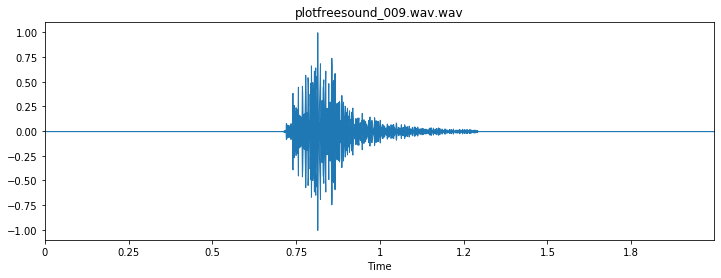

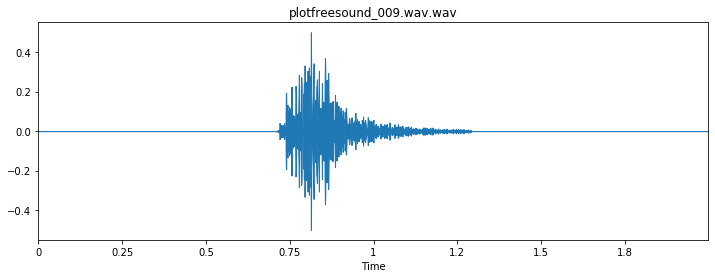

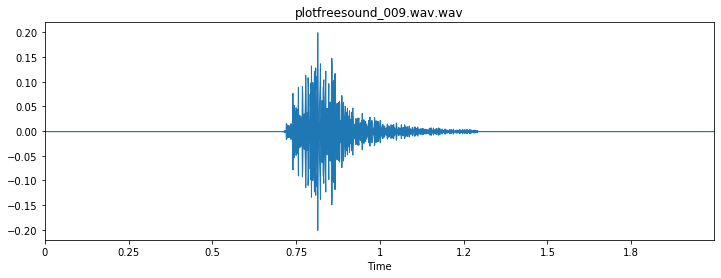

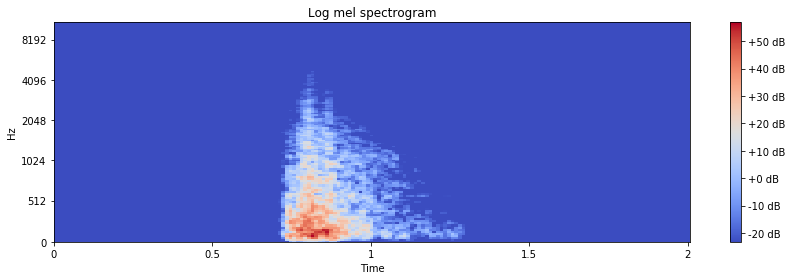

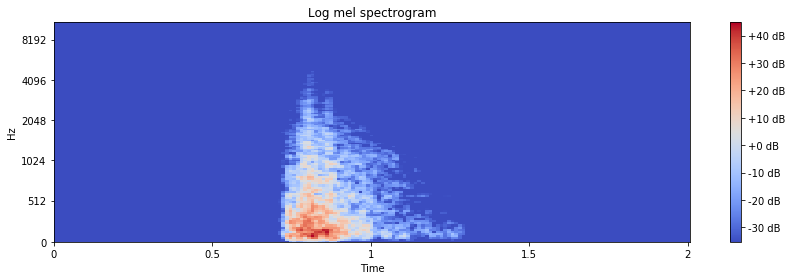

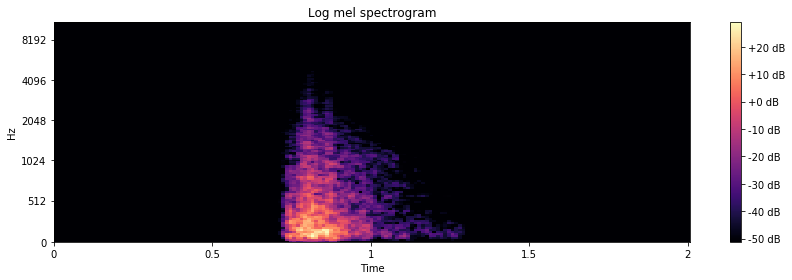

In [12]:
filename = fall_splits[29]['filename_split']
y_normalised = fall_splits[29]['normalised']
y_scaled1 = fall_splits[29]['scaled1']
y_scaled2 = fall_splits[29]['scaled2']
log_S = fall_splits[29]['log_S']
log_S_scaled1 = fall_splits[29]['log_S_scaled1']
log_S_scaled2 = fall_splits[29]['log_S_scaled2']

print(y_normalised)
print(y_scaled1)
print(y_scaled2)
print(log_S)
print(log_S_scaled1)
print(log_S_scaled2)


# Display normalised
plt.figure(figsize=(12,4))
librosa.display.waveplot(y_normalised, sr=SAMPLE_RATE)
plt.title('plot' +filename)

# Display scaled 1
plt.figure(figsize=(12,4))
librosa.display.waveplot(y_scaled1, sr=SAMPLE_RATE)
plt.title('plot'+filename)

# Display scaled 2
plt.figure(figsize=(12,4))
librosa.display.waveplot(y_scaled2, sr=SAMPLE_RATE)
plt.title('plot'+filename)

# Display the log mel spectrogram
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

# Display the log mel spectrogram SCALED 1
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S_scaled1, sr=sr, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

# Display the log mel spectrogram SCALED 2
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S_scaled2, sr=sr, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

# Cough

In [13]:
# from split samples (re-verified), sample + pad + scale + logspec

i = 0
SAMPLE_RATE = 44100

for filename in cough_list: ##### CHANGE HERE #####

    y, sr = librosa.load(cough_path+'/'+filename, sr=SAMPLE_RATE) ##### CHANGE HERE #####
    # y, sr = librosa.load(filepath, sr=SAMPLE_RATE)
    time = librosa.get_duration(y, sr=SAMPLE_RATE)

    if y.shape[0] != 88200:
        x = 88200 - y.shape[0]
        if (x%2 == 0):
            y_padded = np.pad(y, (int(x/2), int(x/2)), 'constant', constant_values=(0))
        elif (x+1)%2 == 0: 
            y_padded = np.pad(y, (int((x+1)/2), int((x-1)/2)), 'constant', constant_values=(0))
    else:
        y_padded = y
        
    y_normalised = y_padded / (np.max(np.abs(y_padded)))
    y_scaled1 = 0.5*y_normalised
    y_scaled2 = 0.2*y_normalised

    melspec = librosa.feature.melspectrogram(y_normalised, sr=sr, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.amplitude_to_db(melspec)
    
    melspec_scaled = librosa.feature.melspectrogram(y_scaled1, sr=sr, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S_scaled1 = librosa.amplitude_to_db(melspec_scaled)

    melspec_scaled = librosa.feature.melspectrogram(y_scaled2, sr=sr, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S_scaled2 = librosa.amplitude_to_db(melspec_scaled)
    
    splits_dict = {}
    splits_dict["filename_split"] = filename
    splits_dict["filepath_split"] = fall_path+'/'+filename
    splits_dict["time in split"] = time
    splits_dict["normalised"] = y_normalised 
    splits_dict["scaled1"] = y_scaled1 
    splits_dict["scaled2"] = y_scaled2 
    splits_dict["log_S"] = log_S 
    splits_dict["log_S_scaled1"] = log_S_scaled1 
    splits_dict["log_S_scaled2"] = log_S_scaled2 

    cough_splits.append(splits_dict) ##### CHANGE HERE #####
    i = i+1
    
    cough_total.append(log_S) ##### CHANGE HERE #####
    cough_total.append(log_S_scaled1) ##### CHANGE HERE #####
    cough_total.append(log_S_scaled2) ##### CHANGE HERE #####
        
print(i)
cough_number = i ##### CHANGE HERE #####

404


# Check on sample

In [14]:
print(cough_number)
print(cough_splits[0]['log_S'], cough_splits[0]['log_S_scaled1'], cough_splits[0]['log_S_scaled2'])


404
[[-38.22559936 -38.22559936 -38.22559936 ... -38.22559936 -38.22559936
  -38.22559936]
 [-38.22559936 -38.22559936 -38.22559936 ... -38.22559936 -38.22559936
  -38.22559936]
 [-38.22559936 -38.22559936 -38.22559936 ... -38.22559936 -38.22559936
  -38.22559936]
 ...
 [-38.22559936 -38.22559936 -38.22559936 ... -38.22559936 -38.22559936
  -38.22559936]
 [-38.22559936 -38.22559936 -38.22559936 ... -38.22559936 -38.22559936
  -38.22559936]
 [-38.22559936 -38.22559936 -38.22559936 ... -38.22559936 -38.22559936
  -38.22559936]] [[-50.26679919 -50.26679919 -50.26679919 ... -50.26679919 -50.26679919
  -50.26679919]
 [-50.26679919 -50.26679919 -50.26679919 ... -50.26679919 -50.26679919
  -50.26679919]
 [-50.26679919 -50.26679919 -50.26679919 ... -50.26679919 -50.26679919
  -50.26679919]
 ...
 [-50.26679919 -50.26679919 -50.26679919 ... -50.26679919 -50.26679919
  -50.26679919]
 [-50.26679919 -50.26679919 -50.26679919 ... -50.26679919 -50.26679919
  -50.26679919]
 [-50.26679919 -50.26679919 

In [15]:
print(cough_total[0:2])

[array([[-38.22559936, -38.22559936, -38.22559936, ..., -38.22559936,
        -38.22559936, -38.22559936],
       [-38.22559936, -38.22559936, -38.22559936, ..., -38.22559936,
        -38.22559936, -38.22559936],
       [-38.22559936, -38.22559936, -38.22559936, ..., -38.22559936,
        -38.22559936, -38.22559936],
       ...,
       [-38.22559936, -38.22559936, -38.22559936, ..., -38.22559936,
        -38.22559936, -38.22559936],
       [-38.22559936, -38.22559936, -38.22559936, ..., -38.22559936,
        -38.22559936, -38.22559936],
       [-38.22559936, -38.22559936, -38.22559936, ..., -38.22559936,
        -38.22559936, -38.22559936]]), array([[-50.26679919, -50.26679919, -50.26679919, ..., -50.26679919,
        -50.26679919, -50.26679919],
       [-50.26679919, -50.26679919, -50.26679919, ..., -50.26679919,
        -50.26679919, -50.26679919],
       [-50.26679919, -50.26679919, -50.26679919, ..., -50.26679919,
        -50.26679919, -50.26679919],
       ...,
       [-50.2667991

# Show total (3x dataset obtained)

In [16]:
i=0
for row in cough_total:
    i = i+1
print(i)    

cough_number_total = i

1212


# Shout

In [17]:
# from split samples (re-verified), sample + pad + scale + logspec

i = 0
SAMPLE_RATE = 44100

for filename in shout_list: ##### CHANGE HERE #####

    y, sr = librosa.load(shout_path+'/'+filename, sr=SAMPLE_RATE) ##### CHANGE HERE #####
    # y, sr = librosa.load(filepath, sr=SAMPLE_RATE)
    time = librosa.get_duration(y, sr=SAMPLE_RATE)

    if y.shape[0] != 88200:
        x = 88200 - y.shape[0]
        if (x%2 == 0):
            y_padded = np.pad(y, (int(x/2), int(x/2)), 'constant', constant_values=(0))
        elif (x+1)%2 == 0: 
            y_padded = np.pad(y, (int((x+1)/2), int((x-1)/2)), 'constant', constant_values=(0))
    else:
        y_padded = y
        
    y_normalised = y_padded /(np.max(np.abs(y_padded)))    
    y_scaled1 = 0.5*y_normalised
    y_scaled2 = 0.2*y_normalised

    melspec = librosa.feature.melspectrogram(y_normalised, sr=sr, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.amplitude_to_db(melspec)
    
    melspec_scaled = librosa.feature.melspectrogram(y_scaled1, sr=sr, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S_scaled1 = librosa.amplitude_to_db(melspec_scaled)
    
    melspec_scaled = librosa.feature.melspectrogram(y_scaled2, sr=sr, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S_scaled2 = librosa.amplitude_to_db(melspec_scaled)

    splits_dict = {}
    splits_dict["filename_split"] = filename
    splits_dict["filepath_split"] = fall_path+'/'+filename
    splits_dict["time in split"] = time
    splits_dict["normalised"] = y 
    splits_dict["scaled1"] = y_scaled1 
    splits_dict["scaled2"] = y_scaled2 
    splits_dict["log_S"] = log_S 
    splits_dict["log_S_scaled1"] = log_S_scaled1 
    splits_dict["log_S_scaled2"] = log_S_scaled2 

    shout_splits.append(splits_dict) ##### CHANGE HERE #####
    i = i+1
    
    shout_total.append(log_S) ##### CHANGE HERE #####
    shout_total.append(log_S_scaled1) ##### CHANGE HERE #####
    shout_total.append(log_S_scaled2) ##### CHANGE HERE #####
        
print(i)
shout_number = i ##### CHANGE HERE #####

678


# Check on sample

In [18]:
print(shout_number)
print(shout_splits[0]['log_S'],shout_splits[0]['log_S_scaled1'],shout_splits[0]['log_S_scaled2'])


678
[[-7.93348827 -7.93348827 -7.93348827 ... -7.93348827 -7.93348827
  -1.74303906]
 [-7.93348827 -7.93348827 -7.93348827 ... -7.93348827 -7.93348827
  -0.30495955]
 [-7.93348827 -7.93348827 -7.93348827 ... -7.93348827 -7.93348827
  -1.04825502]
 ...
 [-7.93348827 -7.93348827 -7.93348827 ... -7.93348827 -7.93348827
  -7.93348827]
 [-7.93348827 -7.93348827 -7.93348827 ... -7.93348827 -7.93348827
  -7.93348827]
 [-7.93348827 -7.93348827 -7.93348827 ... -7.93348827 -7.93348827
  -7.93348827]] [[-19.9746881  -19.9746881  -19.9746881  ... -19.9746881  -19.9746881
  -13.78423889]
 [-19.9746881  -19.9746881  -19.9746881  ... -19.9746881  -19.9746881
  -12.34615938]
 [-19.9746881  -19.9746881  -19.9746881  ... -19.9746881  -19.9746881
  -13.08945485]
 ...
 [-19.9746881  -19.9746881  -19.9746881  ... -19.9746881  -19.9746881
  -19.9746881 ]
 [-19.9746881  -19.9746881  -19.9746881  ... -19.9746881  -19.9746881
  -19.9746881 ]
 [-19.9746881  -19.9746881  -19.9746881  ... -19.9746881  -19.9746881

In [19]:
print(shout_total[0:2])

[array([[-7.93348827, -7.93348827, -7.93348827, ..., -7.93348827,
        -7.93348827, -1.74303906],
       [-7.93348827, -7.93348827, -7.93348827, ..., -7.93348827,
        -7.93348827, -0.30495955],
       [-7.93348827, -7.93348827, -7.93348827, ..., -7.93348827,
        -7.93348827, -1.04825502],
       ...,
       [-7.93348827, -7.93348827, -7.93348827, ..., -7.93348827,
        -7.93348827, -7.93348827],
       [-7.93348827, -7.93348827, -7.93348827, ..., -7.93348827,
        -7.93348827, -7.93348827],
       [-7.93348827, -7.93348827, -7.93348827, ..., -7.93348827,
        -7.93348827, -7.93348827]]), array([[-19.9746881 , -19.9746881 , -19.9746881 , ..., -19.9746881 ,
        -19.9746881 , -13.78423889],
       [-19.9746881 , -19.9746881 , -19.9746881 , ..., -19.9746881 ,
        -19.9746881 , -12.34615938],
       [-19.9746881 , -19.9746881 , -19.9746881 , ..., -19.9746881 ,
        -19.9746881 , -13.08945485],
       ...,
       [-19.9746881 , -19.9746881 , -19.9746881 , ..., 

# Show total (3x dataset obtained)

In [20]:
i=0
for row in shout_total:
    i = i+1
print(i)    

shout_number_total = i

2034


# Speech

In [21]:
# from split samples (re-verified), sample + pad + scale + logspec

i = 0
SAMPLE_RATE = 44100

for filename in speech_list: ##### CHANGE HERE #####

    y, sr = librosa.load(speech_path+'/'+filename, sr=SAMPLE_RATE) ##### CHANGE HERE #####
    # y, sr = librosa.load(filepath, sr=SAMPLE_RATE)
    time = librosa.get_duration(y, sr=SAMPLE_RATE)

    if y.shape[0] != 88200:
        x = 88200 - y.shape[0]
        if (x%2 == 0):
            y_padded = np.pad(y, (int(x/2), int(x/2)), 'constant', constant_values=(0))
        elif (x+1)%2 == 0: 
            y_padded = np.pad(y, (int((x+1)/2), int((x-1)/2)), 'constant', constant_values=(0))
    else:
        y_padded = y
    
    y_normalised = y_padded / (np.max(np.abs(y_padded)))
    y_scaled1 = 0.5*y_normalised
    y_scaled2 = 0.2*y_normalised

    melspec = librosa.feature.melspectrogram(y_normalised, sr=sr, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.amplitude_to_db(melspec)
    
    melspec_scaled = librosa.feature.melspectrogram(y_scaled1, sr=sr, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S_scaled1 = librosa.amplitude_to_db(melspec_scaled)

    melspec_scaled = librosa.feature.melspectrogram(y_scaled2, sr=sr, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S_scaled2 = librosa.amplitude_to_db(melspec_scaled)
    
    splits_dict = {}
    splits_dict["filename_split"] = filename
    splits_dict["filepath_split"] = fall_path+'/'+filename
    splits_dict["time in split"] = time
    splits_dict["normalised"] = y 
    splits_dict["scaled1"] = y_scaled1 
    splits_dict["scaled2"] = y_scaled2 
    splits_dict["log_S"] = log_S 
    splits_dict["log_S_scaled1"] = log_S_scaled1 
    splits_dict["log_S_scaled2"] = log_S_scaled2 

    
    speech_splits.append(splits_dict) ##### CHANGE HERE #####
    i = i+1
    
    speech_total.append(log_S) ##### CHANGE HERE #####
    speech_total.append(log_S_scaled1) ##### CHANGE HERE #####
    speech_total.append(log_S_scaled2) ##### CHANGE HERE #####
        
print(i)
speech_number = i ##### CHANGE HERE #####

1458


# Check on sample

In [22]:
print(speech_number)
print(speech_splits[0]['log_S'], speech_splits[0]['log_S_scaled1'], speech_splits[0]['log_S_scaled2'])


1458
[[-23.16741234 -23.16741234 -23.16741234 ... -23.16741234 -23.16741234
  -23.16741234]
 [-23.16741234 -23.16741234 -23.16741234 ... -23.16741234 -23.16741234
  -23.16741234]
 [-17.54503829 -12.30571719 -13.69853532 ... -23.16741234 -23.16741234
  -23.16741234]
 ...
 [-23.16741234 -23.16741234 -23.16741234 ... -23.16741234 -23.16741234
  -23.16741234]
 [-23.16741234 -23.16741234 -23.16741234 ... -23.16741234 -23.16741234
  -23.16741234]
 [-23.16741234 -23.16741234 -23.16741234 ... -23.16741234 -23.16741234
  -23.16741234]] [[-35.20861217 -35.20861217 -35.20861217 ... -35.20861217 -35.20861217
  -35.20861217]
 [-35.20861217 -35.20861217 -35.20861217 ... -35.20861217 -35.20861217
  -35.20861217]
 [-29.58623812 -24.34691702 -25.73973515 ... -35.20861217 -35.20861217
  -35.20861217]
 ...
 [-35.20861217 -35.20861217 -35.20861217 ... -35.20861217 -35.20861217
  -35.20861217]
 [-35.20861217 -35.20861217 -35.20861217 ... -35.20861217 -35.20861217
  -35.20861217]
 [-35.20861217 -35.20861217

In [23]:
print(speech_total[0:2])

[array([[-23.16741234, -23.16741234, -23.16741234, ..., -23.16741234,
        -23.16741234, -23.16741234],
       [-23.16741234, -23.16741234, -23.16741234, ..., -23.16741234,
        -23.16741234, -23.16741234],
       [-17.54503829, -12.30571719, -13.69853532, ..., -23.16741234,
        -23.16741234, -23.16741234],
       ...,
       [-23.16741234, -23.16741234, -23.16741234, ..., -23.16741234,
        -23.16741234, -23.16741234],
       [-23.16741234, -23.16741234, -23.16741234, ..., -23.16741234,
        -23.16741234, -23.16741234],
       [-23.16741234, -23.16741234, -23.16741234, ..., -23.16741234,
        -23.16741234, -23.16741234]]), array([[-35.20861217, -35.20861217, -35.20861217, ..., -35.20861217,
        -35.20861217, -35.20861217],
       [-35.20861217, -35.20861217, -35.20861217, ..., -35.20861217,
        -35.20861217, -35.20861217],
       [-29.58623812, -24.34691702, -25.73973515, ..., -35.20861217,
        -35.20861217, -35.20861217],
       ...,
       [-35.2086121

# Show total (3x dataset obtained)

In [24]:
i=0
for row in speech_total:
    i = i+1
print(i)    
speech_number_total = i

4374


# Save as 80% train and 20% test data
Split manually by setting indexes

In [25]:
np.save(path +'/new_fall2.npy', fall_total)
np.save(path +'/new_cough2.npy', cough_total)
np.save(path +'/new_shout2.npy', shout_total)
np.save(path +'/new_speech2.npy', speech_total)

In [26]:
new_train = []
new_test = []

In [27]:
new_train.extend(fall_total[0:640])
new_train.extend(cough_total[0:970])
new_train.extend(shout_total[0:1627])
new_train.extend(speech_total[0:3500])

In [28]:
new_test.extend(fall_total[640:])    # 640 to 800
new_test.extend(cough_total[970:])   # 970 to 1211
new_test.extend(shout_total[1627:])  # 1627 to 2033
new_test.extend(speech_total[3500:]) # 3500 to 4373

In [29]:
np.save(path +'/new_train2.npy', new_train)
np.save(path +'/new_test2.npy', new_test)

In [30]:
new_train_label = []

In [31]:
for i in range(640):
    new_train_label.append(0) # fall
for i in range(970): 
    new_train_label.append(1) # cough 
for i in range(1627):
    new_train_label.append(2) # shout
for i in range(3500): 
    new_train_label.append(3) # speech

In [32]:
new_test_label = []

In [33]:
for i in range(161): 
    new_test_label.append(0) # fall
for i in range(242): 
    new_test_label.append(1) # cough
for i in range(407):
    new_test_label.append(2) # shout
for i in range(874): 
    new_test_label.append(3) # speech

In [34]:
np.save(path +'/new_train_label2.npy', new_train_label)

In [35]:
np.save(path +'/new_test_label2.npy', new_test_label)

# New labels (for sigmoid activation model, the prediction for 4 classes are independent of one another)

In [8]:
import numpy as np

In [9]:
new_train_label = []

for i in range(640):
    new_train_label.append([1,0,0,0]) # fall
for i in range(970): 
    new_train_label.append([0,1,0,0]) # cough
for i in range(1627):
    new_train_label.append([0,0,1,0]) # shout
for i in range(3500): 
    new_train_label.append([0,0,0,1]) # speech

In [10]:
new_test_label = []

for i in range(161): 
    new_test_label.append([1,0,0,0]) # fall
for i in range(242): 
    new_test_label.append([0,1,0,0]) # cough
for i in range(407):
    new_test_label.append([0,0,1,0]) # shout
for i in range(874): 
    new_test_label.append([0,0,0,1]) # speech

In [11]:
path = "C:/Users/Alicia/Desktop/new train data"

In [12]:
np.save(path +'/new_train_label2sigmoid.npy', new_train_label)
np.save(path +'/new_test_label2sigmoid.npy', new_test_label)

# Load and check train and test dataset

In [36]:
os.chdir("C:/Users/Alicia/Desktop/new train data")

train_data = np.load('new_train2.npy', allow_pickle=True)
test_data = np.load('new_test2.npy', allow_pickle=True)

In [37]:
train_label = np.load('new_train_label2.npy', allow_pickle=True)
test_label = np.load('new_test_label2.npy', allow_pickle=True)

In [38]:
print(train_label.shape)
print(test_label.shape)

(6737,)
(1684,)


In [39]:
print(train_data.shape)
print(test_data.shape)

(6737, 128, 173)
(1684, 128, 173)


In [5]:
import os

# Check labels of dataset for sigmoid model training


In [13]:
os.chdir("C:/Users/Alicia/Desktop/new train data")

train_label = np.load('new_train_label2sigmoid.npy', allow_pickle=True)
test_label = np.load('new_test_label2sigmoid.npy', allow_pickle=True)

In [14]:
print(train_label.shape)
print(test_label.shape)

(6737, 4)
(1684, 4)


# Convert to input shape for MobileNet model, i.e. 224,224,3 
##### a. pad data with mean
##### b. duplicate to 3 channels

In [ ]:
start_index_x = (224-128)//2
# start_index_x = 48
end_index_x = (224-128)//2 + 128
# end_index_x = 176
start_index_y = (224-173)//2
# start_index_y = 25
end_index_y = (224-173)//2 + 173
# end_index_y = 198
# print(start_index_x, end_index_x, start_index_y, end_index_y)

new_train_data = np.empty(shape=(6737,224,224,3)) ##### CHANGE HERE ##### 

for i in range(6737): ##### CHANGE HERE ##### 
    mean = np.mean(train_data[i]) # shape is alr (128,173)
    # data_squeeze = np.squeeze(train_all[i])# (128,173,1) to (128,173) 
    spectrogram = mean*np.ones(shape = (224,224,3))
    for j in range(3):
        spectrogram[start_index_x:end_index_x, start_index_y:end_index_y,j] = train_data[i]

    new_train_data[i] = spectrogram

In [42]:
np.save('C:/Users/Alicia/Desktop/new train data/train_data_converted2.npy', new_train_data)

In [43]:
start_index_x = (224-128)//2
# start_index_x = 48
end_index_x = (224-128)//2 + 128
# end_index_x = 176
start_index_y = (224-173)//2
# start_index_y = 25
end_index_y = (224-173)//2 + 173
# end_index_y = 198
# print(start_index_x, end_index_x, start_index_y, end_index_y)

new_test_data = np.empty(shape=(1684,224,224,3)) ##### CHANGE HERE ##### not 1127

for i in range(1684): ##### CHANGE HERE ##### not 1127
    mean = np.mean(test_data[i]) # shape is alr (128,173)
    # data_squeeze = np.squeeze(train_all[i])# (128,173,1) to (128,173) 
    spectrogram = mean*np.ones(shape = (224,224,3))
    for j in range(3):
        spectrogram[start_index_x:end_index_x, start_index_y:end_index_y,j] = test_data[i]

    new_test_data[i] = spectrogram

In [44]:
np.save('C:/Users/Alicia/Desktop/new train data/test_data_converted2.npy', new_test_data)

# Labels have dimension N, 1

In [45]:
train_label_converted = np.expand_dims(train_label, axis=1)
test_label_converted = np.expand_dims(test_label, axis=1)

In [46]:
print(train_label_converted.shape)
print(test_label_converted.shape)

(6737, 1)
(1684, 1)


In [47]:
np.save('C:/Users/Alicia/Desktop/new train data/train_label_converted2.npy', train_label_converted)
np.save('C:/Users/Alicia/Desktop/new train data/test_label_converted2.npy', test_label_converted)

# Check shape of final prepared datasets
Ready for model training

In [48]:
os.chdir("C:/Users/Alicia/Desktop/new train data")

train_converted = np.load('train_data_converted2.npy', allow_pickle=True)
test_converted = np.load('test_data_converted2.npy', allow_pickle=True)
train_label_converted = np.load('train_label_converted2.npy', allow_pickle=True)
test_label_converted = np.load('test_label_converted2.npy', allow_pickle=True)

In [49]:
print(train_converted.shape)
print(test_converted.shape)
print(train_label_converted.shape)
print(test_label_converted.shape)

(6737, 224, 224, 3)
(1684, 224, 224, 3)
(6737, 1)
(1684, 1)
